# Flood Prediction Data Processing

In this notebook, the data will be obtained and cleaned

## Import the necesary libraries


In [1]:
# Set configuration for notebook
import os

os.chdir('c:\\Users\\Spectra\\flood-prediction')
os.getcwd()

'c:\\Users\\Spectra\\flood-prediction'

In [2]:
# Import libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from src.utils import load_config

In [19]:
# Load config file
config = load_config()

## Data Obtainance

In [4]:
# Obtain the data
raw_flood_df = pd.read_csv(config["data"]["raw_data_path"])

In [5]:
# View the data
raw_flood_df.head()

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN


## Data Inspection

In [21]:
# Check info
raw_flood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20544 entries, 0 to 20543
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sl                 20544 non-null  int64  
 1   Station_Names      20544 non-null  object 
 2   Year               20544 non-null  int64  
 3   Month              20544 non-null  int64  
 4   Max_Temp           20544 non-null  float64
 5   Min_Temp           20544 non-null  float64
 6   Rainfall           20544 non-null  float64
 7   Relative_Humidity  20544 non-null  float64
 8   Wind_Speed         20544 non-null  float64
 9   Cloud_Coverage     20544 non-null  float64
 10  Bright_Sunshine    20544 non-null  float64
 11  Station_Number     20544 non-null  int64  
 12  X_COR              20544 non-null  float64
 13  Y_COR              20544 non-null  float64
 14  LATITUDE           20544 non-null  float64
 15  LONGITUDE          20544 non-null  float64
 16  ALT                205

In [6]:
# Check for missing values
raw_flood_df.isna().sum()

Sl                       0
Station_Names            0
Year                     0
Month                    0
Max_Temp                 0
Min_Temp                 0
Rainfall                 0
Relative_Humidity        0
Wind_Speed               0
Cloud_Coverage           0
Bright_Sunshine          0
Station_Number           0
X_COR                    0
Y_COR                    0
LATITUDE                 0
LONGITUDE                0
ALT                      0
Period                   0
Flood?               16051
dtype: int64

There are some missing values in the flood column which need to be replaced

In [7]:
# Check overall description of the data
raw_flood_df.describe()

,Sl,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
count,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,4493.000000
mean,10271.500000,1985.332944,6.500000,33.450739,21.166872,198.776621,79.497375,1.415049,3.485827,6.419056,41935.098131,549703.189176,579280.955958,23.326647,90.493193,13.357477,1985.397944,0.919653
std,5930.686301,17.610799,3.452137,2.956401,4.949587,240.693197,7.667925,1.042454,2.083791,1.747959,36.516932,116032.076255,130616.053201,1.155241,1.108720,13.529530,17.610832,0.271860
min,0.000000,1948.000000,1.000000,21.600000,6.200000,0.000000,34.000000,0.000000,0.000000,0.000000,41859.000000,0.000000,0.000000,20.870000,88.560000,0.000000,1948.010000,0.000000
25%,5135.750000,1972.000000,3.750000,31.700000,16.900000,8.000000,75.000000,0.700000,1.600000,4.965517,41909.000000,435303.700000,504500.300000,22.640000,89.550000,4.000000,1972.050000,1.000000
50%,10271.500000,1987.000000,6.500000,33.900000,23.400000,111.000000,81.000000,1.200000,3.300000,6.800000,41941.000000,540098.600000,561770.300000,23.170000,90.410000,7.000000,1987.040000,1.000000
75%,15407.250000,2000.000000,9.250000,35.400000,25.400000,312.000000,85.000000,1.900000,5.500000,7.800000,41963.000000,650012.100000,687095.900000,24.290000,91.460000,19.000000,2000.092500,1.000000
max,20543.000000,2013.000000,12.000000,44.000000,28.100000,2072.000000,97.000000,11.200000,7.900000,11.000000,41998.000000,734765.400000,844822.300000,25.720000,92.260000,63.000000,2013.120000,1.000000


In [10]:
# Check the duplicates

duplicate_rows = raw_flood_df[raw_flood_df.duplicated()]

# Get count of duplicate rows
num_duplicates = len(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


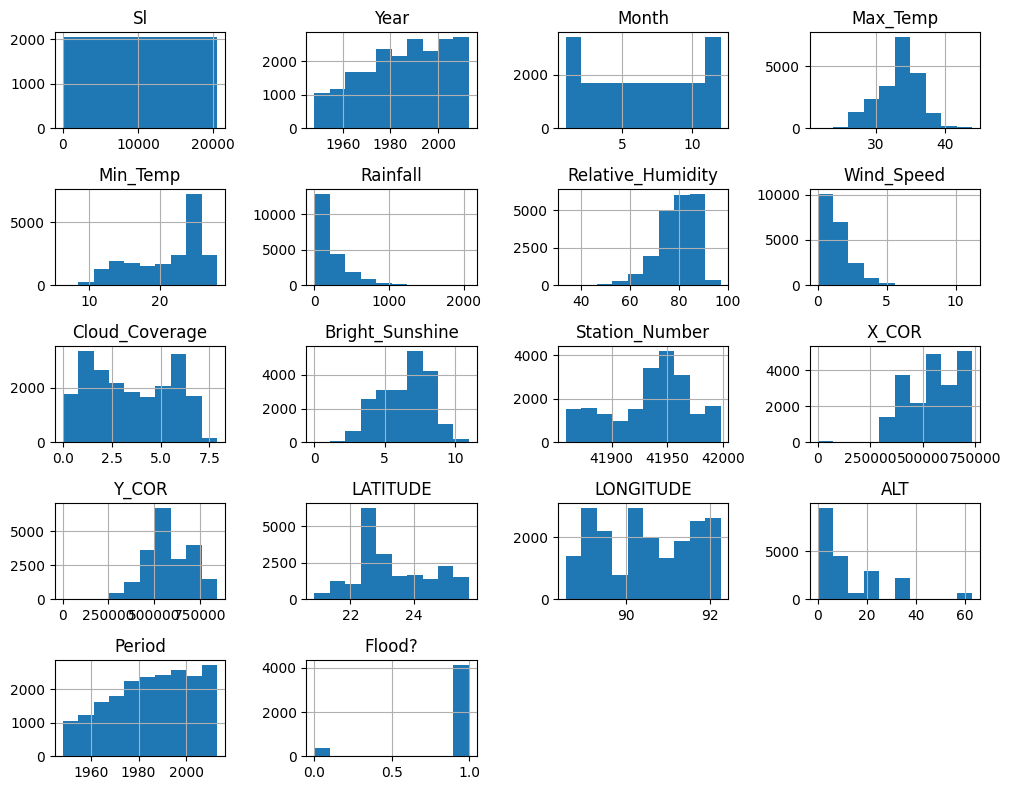

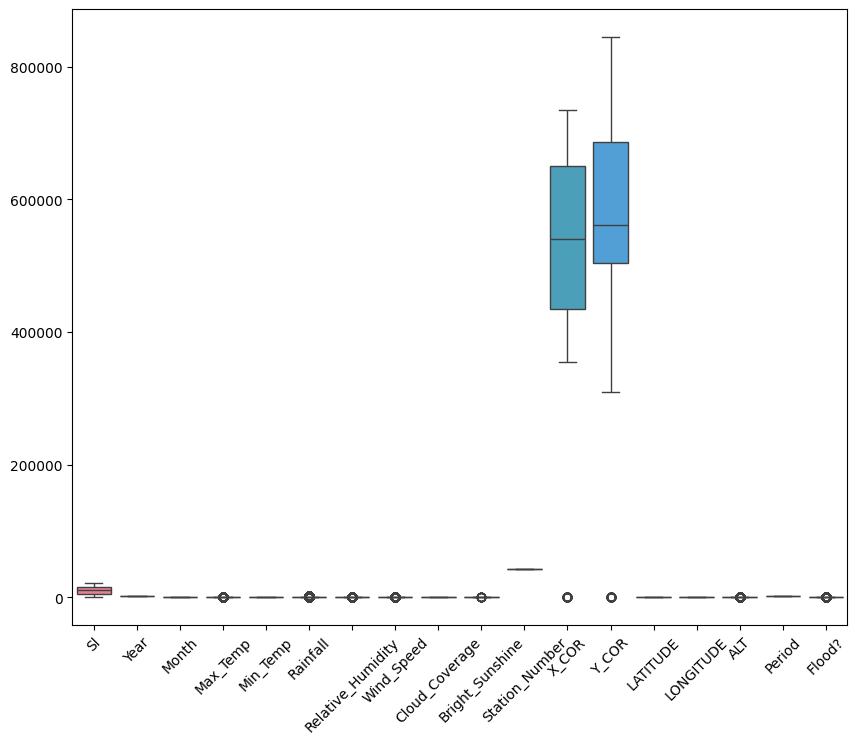

In [12]:
# Check data distribution
# Explore distribution using histograms
raw_flood_df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Explore distribution using box plots
plt.figure(figsize=(10, 8))
sns.boxplot(data=raw_flood_df)
plt.xticks(rotation=45)
plt.show()

## Data Cleaning

In [13]:
# Handle missing values. Fill in with 0 for flood
raw_flood_df['Flood?'].fillna(0, inplace=True)

C:\Users\Spectra\AppData\Local\Temp\ipykernel_38404\1753236132.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_flood_df['Flood?'].fillna(0, inplace=True)


In [14]:
# Rename the flood column
raw_flood_df.rename(columns={"Flood?":"Flood"}, inplace=True)

In [16]:
# Ensure that the flood column is an int
raw_flood_df["Flood"] = raw_flood_df["Flood"].astype(int)

In [20]:
# Save the clean data
raw_flood_df.to_csv(config["data"]["processed_data_path"], index=False)